In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [69]:
import numpy as np
import pylab as plt
import glob
import os
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
#import sympy #symoblic python
import mpmath as math
#import cv2
import glob
import csv
import os

In [4]:
date = '031123'
folderbase = date+'_5runs/'
savefolder = 'Results/'+date+'_5_tests/'
if not os.path.isdir(savefolder):
    os.makedirs(savefolder)

In [5]:
#get start time, duration of recording
data = {}
data['time']={}

for i in range(1,6):
    folder = folderbase+str(i)#/media/turbots/DATA/thiou/labshared2/Windveil/NedFacades/recaps/'
    csv_timelist = glob.glob(folder+'/*/*/time.csv')

    for filename in csv_timelist:
        #print(filename)
        rows = []
        num = int(filename.split('_')[-1].split('/')[0])-100
        expnum= int(filename.split('/')[1])
        #print(i,expnum)
        #print(num)
        k = num
        data['time'][(i,k)]={}
        with open(filename) as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for row in spamreader:
                rows.append(row)
                #print(', '.join(row))
            data['time'][(i,k)]['raw']=rows
    #filename = glob.glob(folder+'*.csv')[0]

In [6]:
print(data['time'].keys())
print(data['time'][(1,10)]['raw'][2])

dict_keys([(1, 9), (1, 29), (1, 24), (1, 3), (1, 1), (1, 4), (1, 28), (1, 17), (1, 8), (1, 14), (1, 23), (1, 6), (1, 18), (1, 7), (1, 30), (1, 15), (1, 2), (1, 22), (1, 27), (1, 31), (1, 26), (1, 13), (1, 33), (1, 32), (1, 16), (1, 5), (1, 11), (1, 25), (1, 10), (1, 21), (1, 20), (1, 12), (1, 19), (2, 9), (2, 29), (2, 24), (2, 3), (2, 1), (2, 4), (2, 28), (2, 17), (2, 8), (2, 14), (2, 23), (2, 6), (2, 18), (2, 7), (2, 30), (2, 15), (2, 2), (2, 22), (2, 27), (2, 31), (2, 26), (2, 13), (2, 33), (2, 32), (2, 16), (2, 5), (2, 11), (2, 25), (2, 10), (2, 21), (2, 20), (2, 12), (2, 19), (3, 9), (3, 29), (3, 24), (3, 3), (3, 1), (3, 4), (3, 28), (3, 17), (3, 8), (3, 14), (3, 23), (3, 6), (3, 18), (3, 7), (3, 30), (3, 15), (3, 2), (3, 22), (3, 27), (3, 31), (3, 26), (3, 13), (3, 33), (3, 32), (3, 16), (3, 5), (3, 11), (3, 25), (3, 10), (3, 21), (3, 20), (3, 12), (3, 19), (4, 9), (4, 29), (4, 24), (4, 3), (4, 1), (4, 4), (4, 28), (4, 17), (4, 8), (4, 14), (4, 23), (4, 6), (4, 18), (4, 7), (4, 30

In [7]:
starts = np.asarray([float(data['time'][k]['raw'][1][2]) for k in data['time'].keys()])
stops = np.asarray([float(data['time'][k]['raw'][2][2]) for k in data['time'].keys()])
print(stops-starts)

[44.35899997 41.90700006 44.10700011 42.81799984 40.65799999 42.48000002
 43.273      44.32000017 44.38899994 44.38499999 43.86000013 44.84800005
 43.70600009 44.50300002 41.61100006 45.23699999 43.08399987 43.9690001
 43.58700013 41.94099998 43.69300008 43.43000007 42.1329999  42.04200006
 45.14899993 43.80499983 43.88399982 43.74600005 44.19499993 44.44800019
 43.47300005 43.38100004 44.00200009 37.21399999 36.06699991 37.38899994
 40.         38.95899987 39.90899992 36.44300008 36.96700001 38.41299987
 37.02800012 37.23099995 39.58399987 36.96300006 38.3440001  36.69199991
 37.20900011 38.78299999 36.74000001 36.84800005 36.35599995 36.60000014
 37.09399986 35.97399998 36.61299992 36.86599994 39.60699987 37.39599991
 36.648      37.40899992 37.21399999 36.70900011 37.13499999 36.65300012
 38.00300002 35.51900005 36.75600004 40.23799992 40.72200012 39.85000014
 35.82999992 37.01800013 37.47799993 37.46599984 37.00999999 39.15399981
 36.60400009 37.57999992 36.55900002 37.79200006 40.

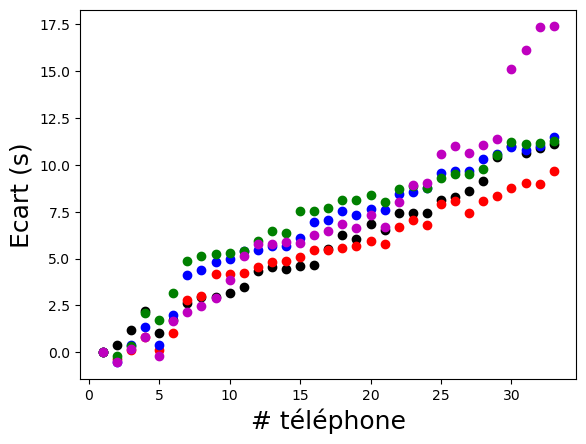

In [8]:
#Dt = starts-starts[0]
colors = ['k' ,'r' ,'b','g','m']
for (i,num) in data['time'].keys():
    k = (i,num)
    #if i==1:
    #    print(num)
    data['time'][k]['dt']= float(data['time'][k]['raw'][1][2])-float(data['time'][(i,1)]['raw'][1][2])
    #print(num,Dt[num-1])
    plt.plot(num,data['time'][k]['dt'],marker='o',color=colors[i-1])
#plt.plot(starts-starts[0])

figs = graphes.legende('# téléphone','Ecart (s)','')
#graphes.save_figs(figs,savedir=savefolder)

In [9]:
# look at correlation along z
#get start time, duration of recording
key = 'xyz'
data[key]={}
keys = ['t','ax','ay','az']

for i in range(1,6):
    folder = folderbase+str(i)#/media/turbots/DATA/thiou/labshared2/Windveil/NedFacades/recaps/'
    csv_timelist = glob.glob(folder+'/*/Raw Data.csv')
    #print(csv_timelist)

    for filename in csv_timelist:
        rows = []
        num = int(filename.split('_')[-1].split('/')[0])-100
        #print(num)
        data[key][(i,num)]={}
        with open(filename) as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for j,row in enumerate(spamreader):
                rows.append(row)
                #print(', '.join(row))
                for l,k in enumerate(keys):
                    if j==0:
                        data[key][(i,num)][k]=[]
                    else:
                        data[key][(i,num)][k].append(float(row[l]))

#filename = glob.glob(folder+'*.csv')[0]

In [10]:
key = 'xyz'
data['xyz'][(1,1)].keys()


dict_keys(['t', 'ax', 'ay', 'az'])

figure already exists


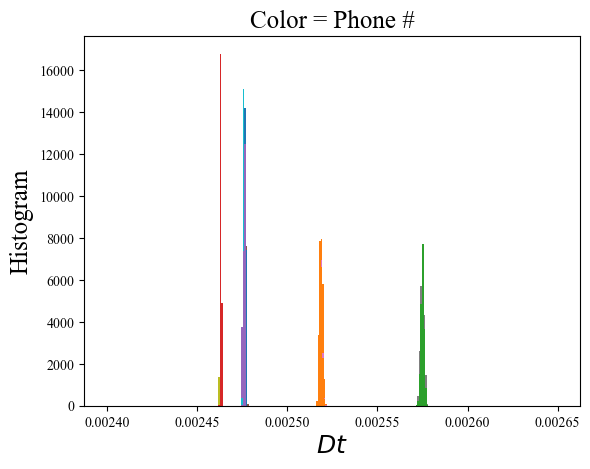

In [11]:
for (i,num) in data[key].keys():
    #print(num)
    if num>5 and num<11:
        fig = plt.hist(np.diff(data[key][(i,num)]['t']),np.linspace(0.0024,0.00265,300))
figs = graphes.legende('$Dt$','Histogram','Color = Phone #')
graphes.save_figs(figs,savedir=savefolder)

figure already exists


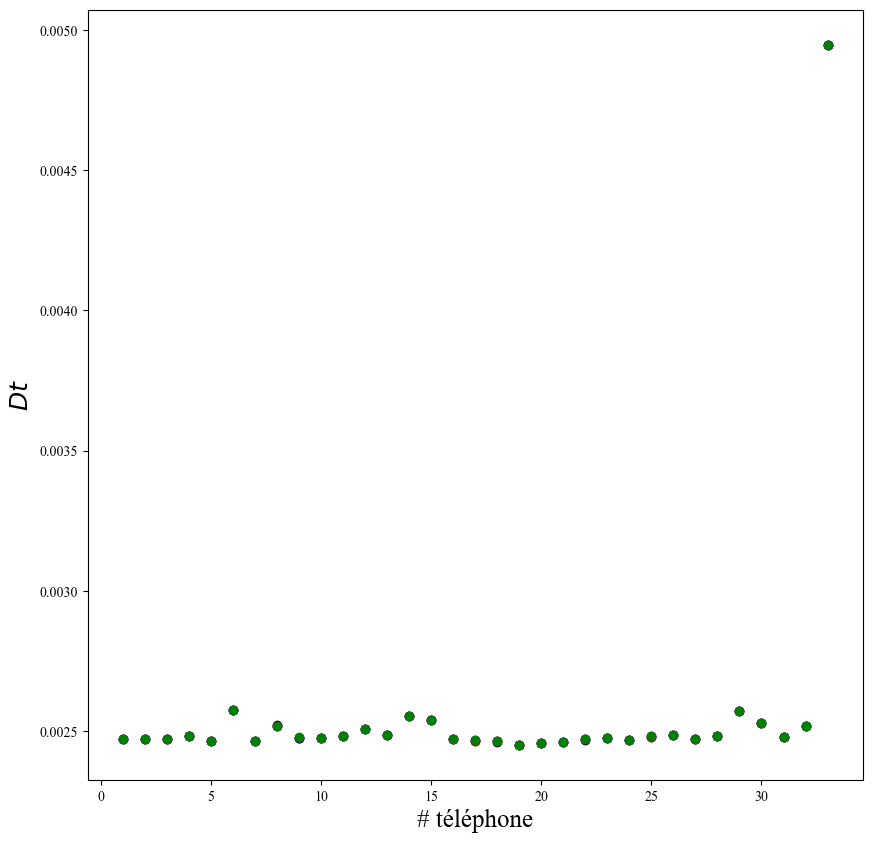

In [12]:
tellist = range(1,34)
fig,ax = plt.subplots(figsize=(10,10))

for i in range(1,5):
    Ft,Ft_std = [],[]
    for num in tellist:
        ft = np.mean(np.diff(data[key][(i,num)]['t']))
        ft_std = np.std(np.diff(data[key][(i,num)]['t']))
        Ft.append(ft)
        Ft_std.append(ft_std)

    plt.errorbar(tellist,Ft,np.asarray(Ft_std)/20,marker='o',color=colors[i-1],ls=' ')
    figs = graphes.legende('# téléphone','$Dt$','')
graphes.save_figs(figs,savedir=savefolder,prefix='Time_Synchronisation')

figure already exists


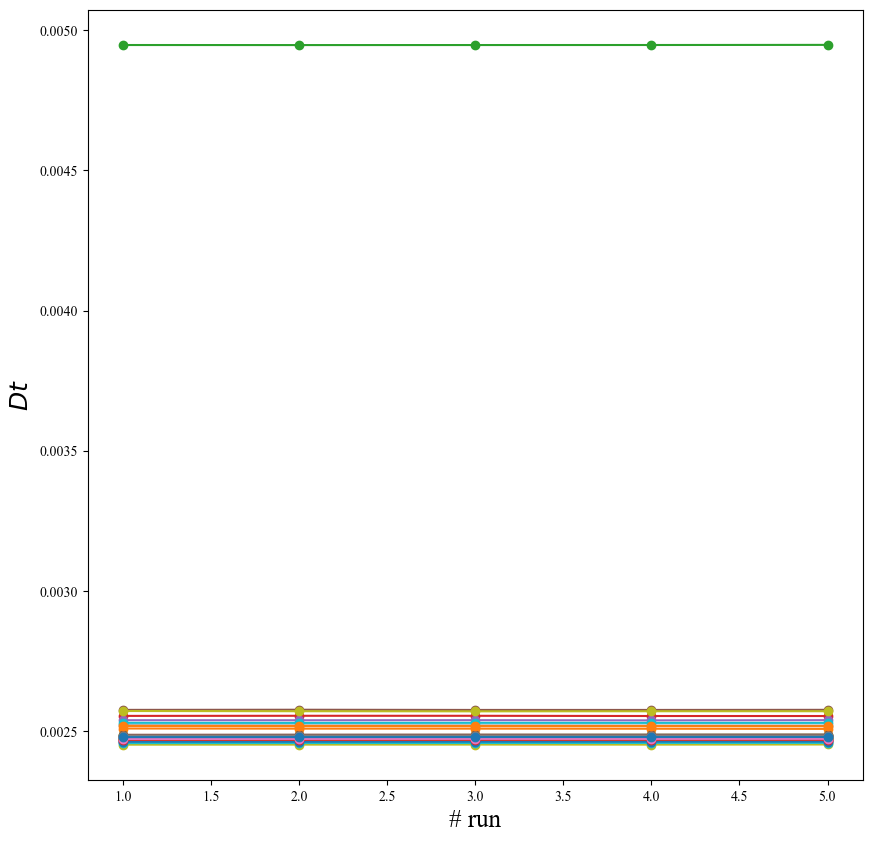

In [13]:
tellist = np.arange(1,34)
fig,ax = plt.subplots(figsize=(10,10))

for num in tellist:
    Ft,Ft_std = [],[]
    for i in range(1,6):
        ft = np.mean(np.diff(data[key][(i,num)]['t']))
        ft_std = np.std(np.diff(data[key][(i,num)]['t']))
        Ft.append(ft)
        Ft_std.append(ft_std)

    plt.errorbar(range(1,6),Ft,np.asarray(Ft_std),marker='o',ls='-')
    figs = graphes.legende('# run','$Dt$','')
graphes.save_figs(figs,savedir=savefolder)

In [14]:
(np.max(Ft)-np.min(Ft))/np.mean(Ft)

0.00013586179802132096

In [15]:
#type(data[key][k]['t'])

In [16]:
dt = np.mean(Ft)
f={}
tellist = []
for (i,num) in data[key].keys():
    if num<250:
        k = (i,num)
        #print(k)
        #np.asarray(data[key][k]['t'])
        #print(data['time'].keys())
        if k not in data['time'].keys() or 'dt' not in data['time'][k]:
            print(k)
            continue
            #interpolation in space for the phone missing time reference
            for kk in keys:
                data[key][(i,num)][kk] = (np.asarray(data[key][(i,num-1)][kk])+np.asarray(data[key][(i,num+1)][kk]))/2
            
            data['time'][k]={}
            data['time'][k]['dt']=(data['time'][(i,num-1)]['dt']+data['time'][(i,num+1)]['dt'])/2
        else:
            if i==1:
                tellist.append(num)
            f[k] = interp.interp1d(np.asarray(data[key][k]['t'])+data['time'][k]['dt'],data[key][k]['az'])

In [17]:
len(tellist)

33

In [18]:
ti = {}
N = {}

for i in range(1,6):
    minT = []
    maxT = []
    for num in tellist:  
        k = (i,num)
        t = np.asarray(data[key][k]['t'])+data['time'][k]['dt']
        minT.append(t[0])
        maxT.append(t[-1])

    mint = np.max(minT)
    maxt = np.min(maxT)

    print(maxt-mint)
    ti[i] = np.arange(mint,maxt,dt/10)
    N[i] = len(ti[i])
    print(N)

29.493857870830688
{1: 59614}
28.67436918368054
{1: 59614, 2: 57957}
28.639978016
{1: 59614, 2: 57957, 3: 57888}
29.772662909057495
{1: 59614, 2: 57957, 3: 57888, 4: 60177}
28.904975078591065
{1: 59614, 2: 57957, 3: 57888, 4: 60177, 5: 58423}


In [19]:
n = 33#len(tellist)
Z = {}
for i in range(1,6):
    Z[i] = np.zeros((n,N[i]))
    
    for j,num in enumerate(tellist):
        Z[i][num-1,:] = f[(i,num)](ti[i])
        Z[i][num-1,:] = Z[i][num-1,:] - np.mean(Z[i][num-1,:])

    #fig,ax = plt.subplots(figsize=(15,5))
    #for num in tellist:
    #    ax.plot(ti,Z[i-1,num-1,:])
    #    graphes.legende('Time (s)','Acceleration m/s$^2$','Interpolated time')

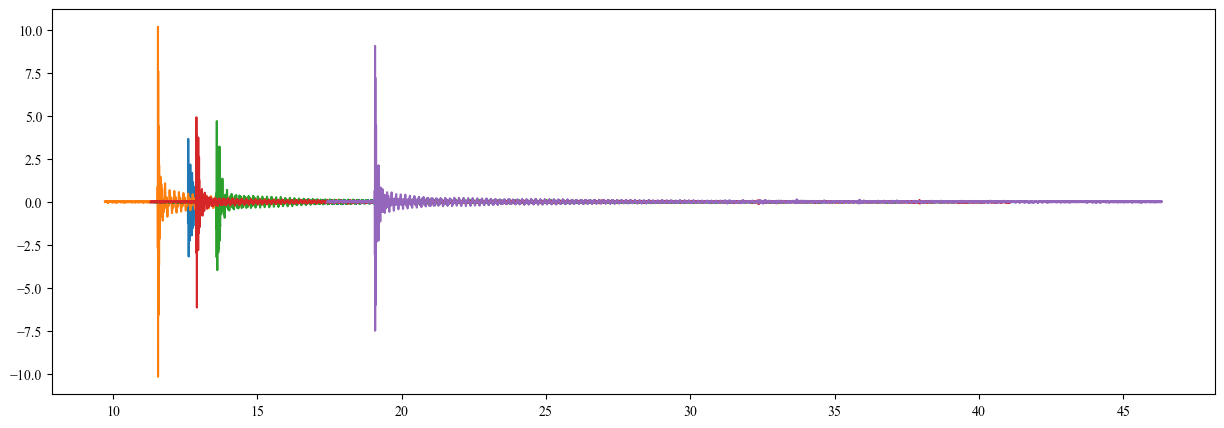

In [20]:
num=1
fig,ax = plt.subplots(figsize=(15,5))
for i in range(1,6):
    ax.plot(ti[i],Z[i][num-1,:])

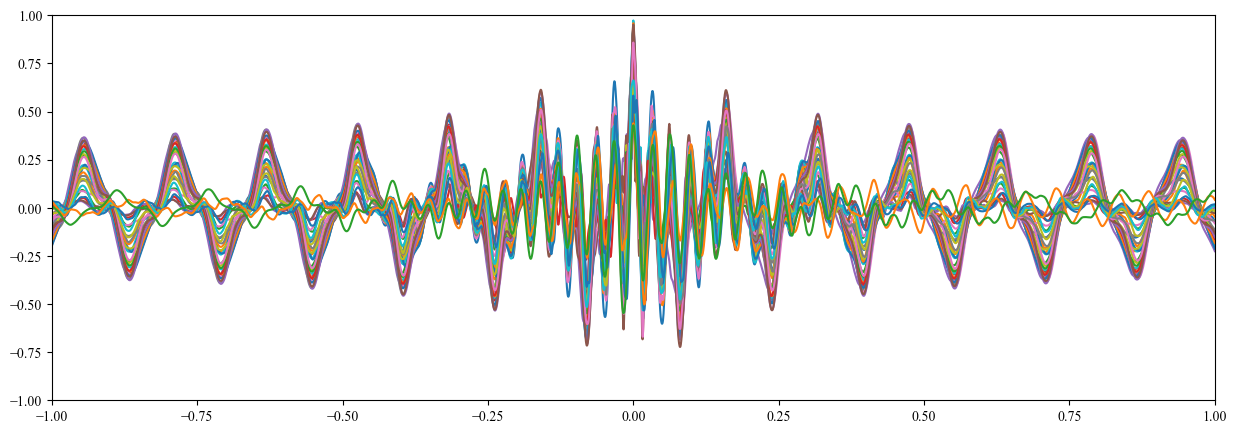

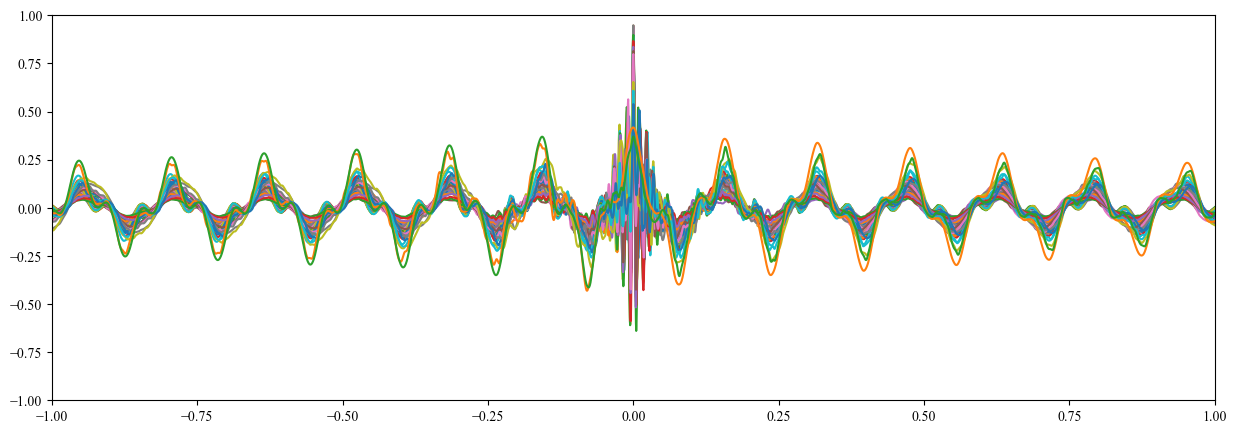

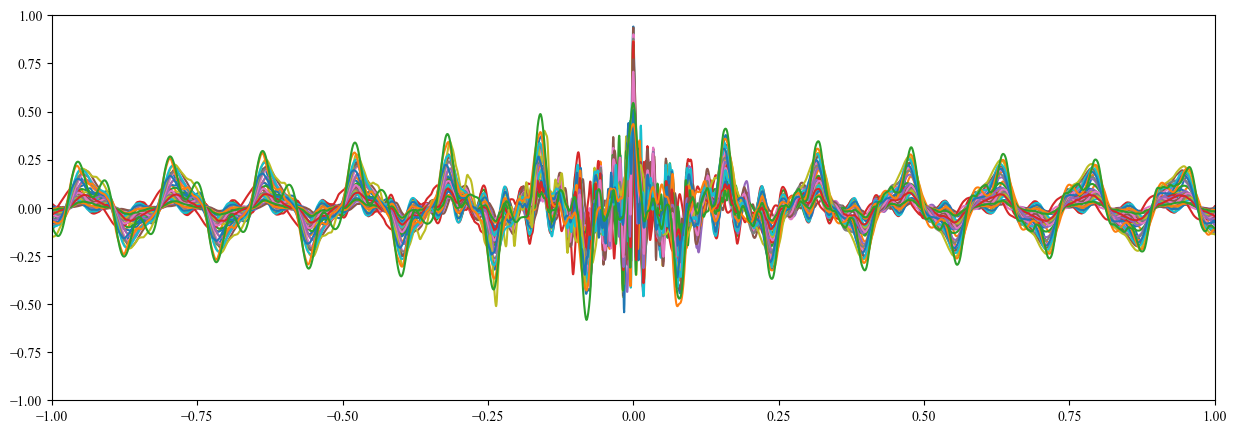

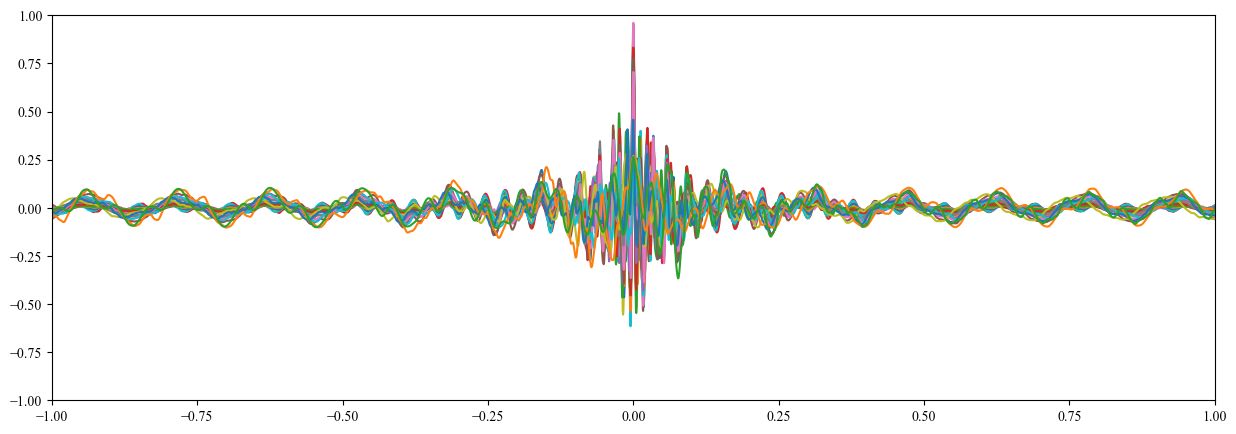

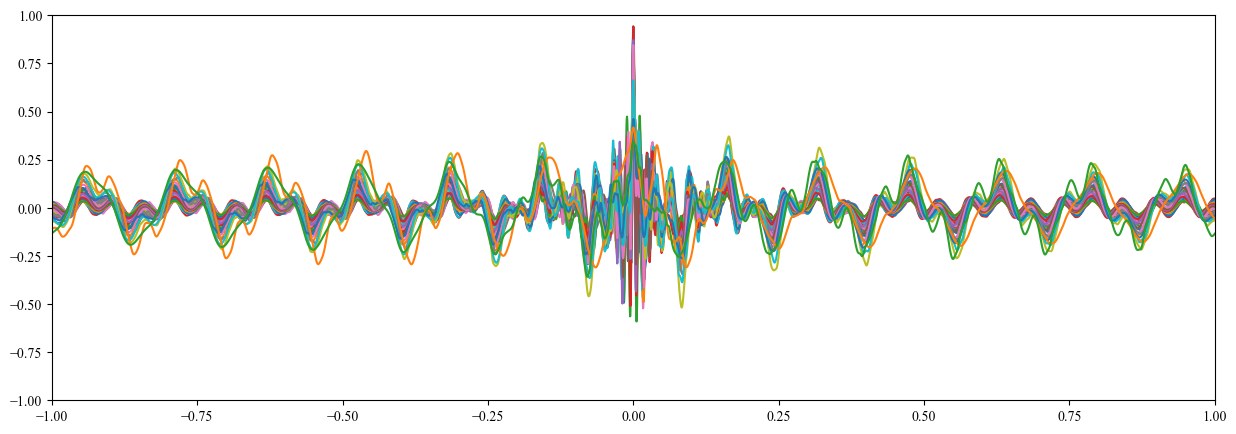

In [21]:
import scipy.signal as sig
tellist = np.arange(1,34)

j=1
Dt2 = np.zeros((5,n))
for i in range(1,6):
    fig,ax = plt.subplots(figsize=(15,5))

    for num in tellist:
        nump = np.mod(num+j-1,n)+1
        #print(num,nump)
        #numm = np.mod(num+j-3,n)+1

        #print(num,num2)

        Cp = np.asarray(sig.correlate(Z[i][num-1,:],Z[i][nump-1,:],mode='same'))
        Norm = np.sqrt(np.sum(Z[i][num-1,:]**2)*np.sum(Z[i][nump-1,:]**2))
        Cp = Cp/Norm

        lag = ti[i]-np.mean(ti[i])
        k = np.argmax(Cp)
        Dt2[i-1,num-1] = lag[k]
#        Dtm[num-1] = lag[k]

        ax.plot(lag-Dt2[i-1,num-1],Cp)
    plt.axis([-1,1,-1,1])

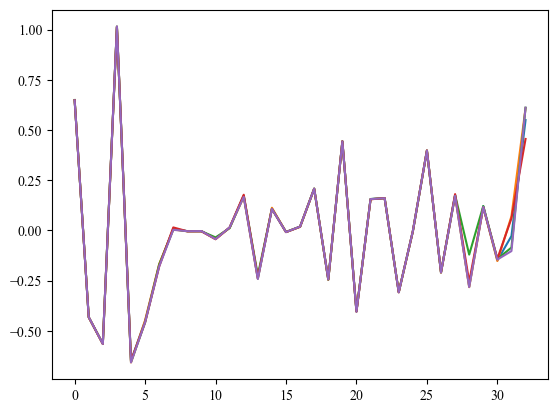

In [22]:
for i in range(1,6):
    plt.plot(Dt2[i-1,:])

figure already exists


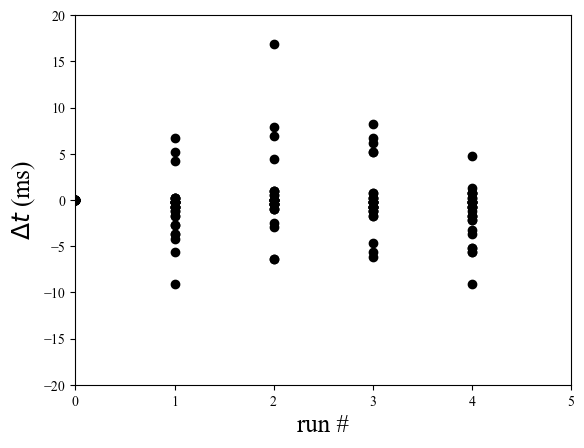

In [23]:
plt.plot((Dt2[:,:]-Dt2[0,:])*1000,'ko')
plt.axis([0,5,-20,20])
figs = graphes.legende('run #',r'$\Delta t$ (ms)','')
graphes.save_figs(figs,savedir=savefolder)

In [27]:
Dt2.shape

(5, 33)

In [28]:
lags = np.cumsum(Dt2,axis=1)

In [34]:
n

33

(0.0, 34.0, 0.0, 0.4)

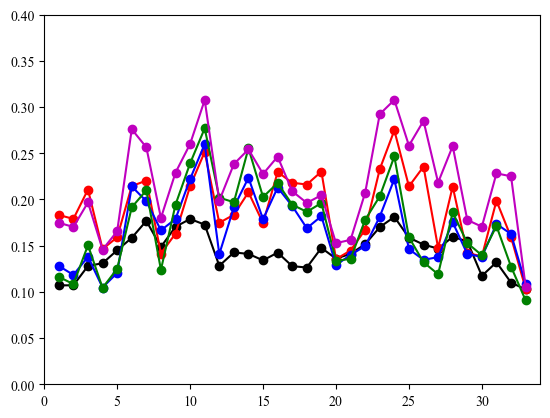

In [55]:
i=1
colors = ['k' ,'r' ,'b','g','m']

for i in range(1,6):
    Zrms  = []
    for num in tellist:
        Zrms.append(np.std(Z[i][num-1,:]))
    
    plt.plot(tellist,Zrms,marker='o',color=colors[i-1])
    
plt.axis([0,34,0,0.4])

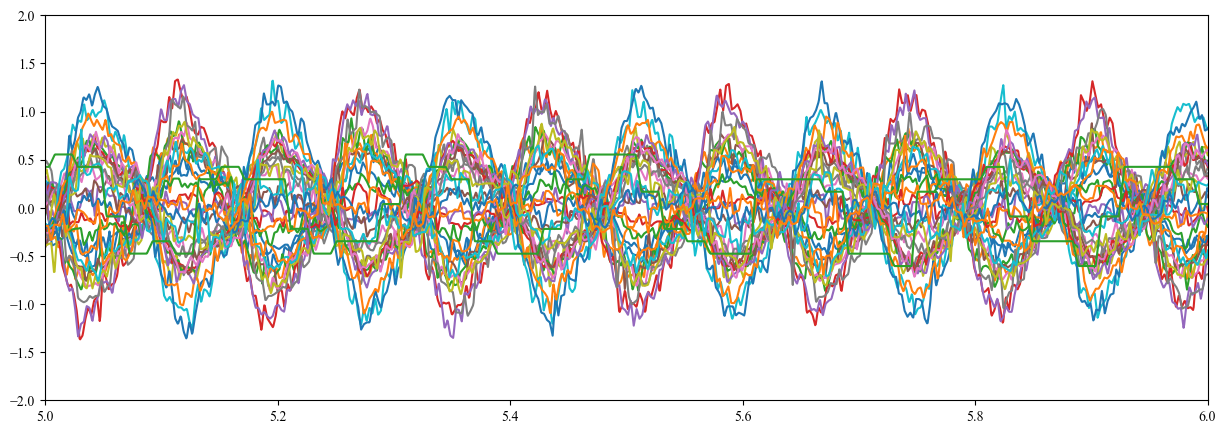

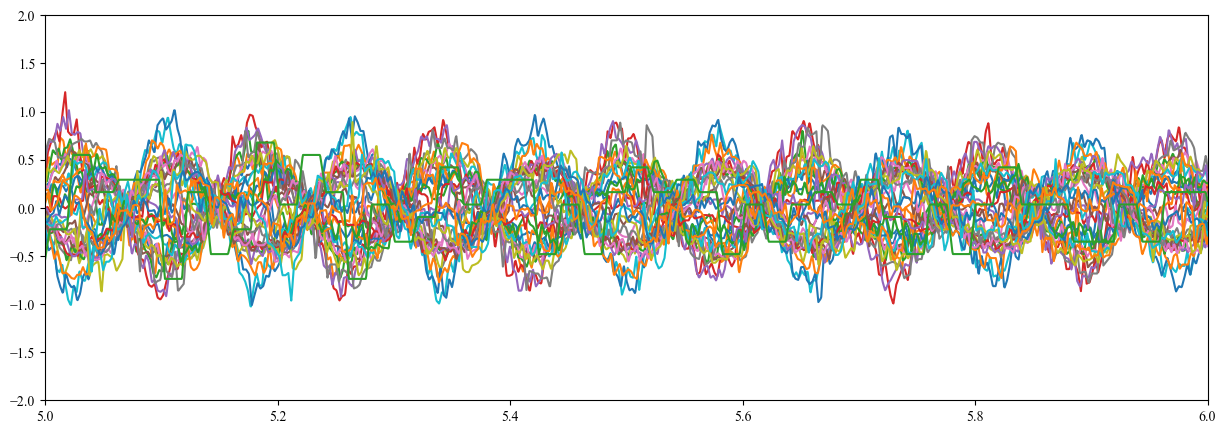

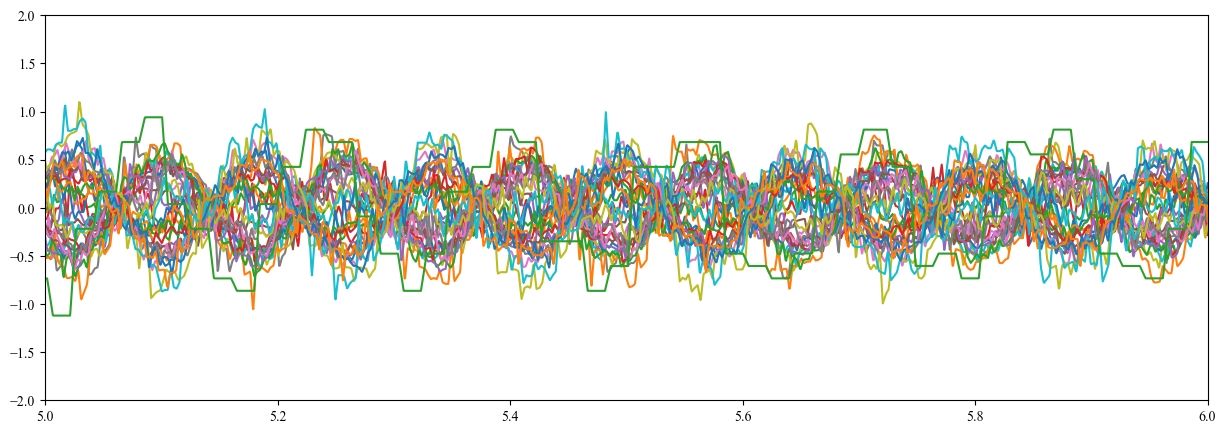

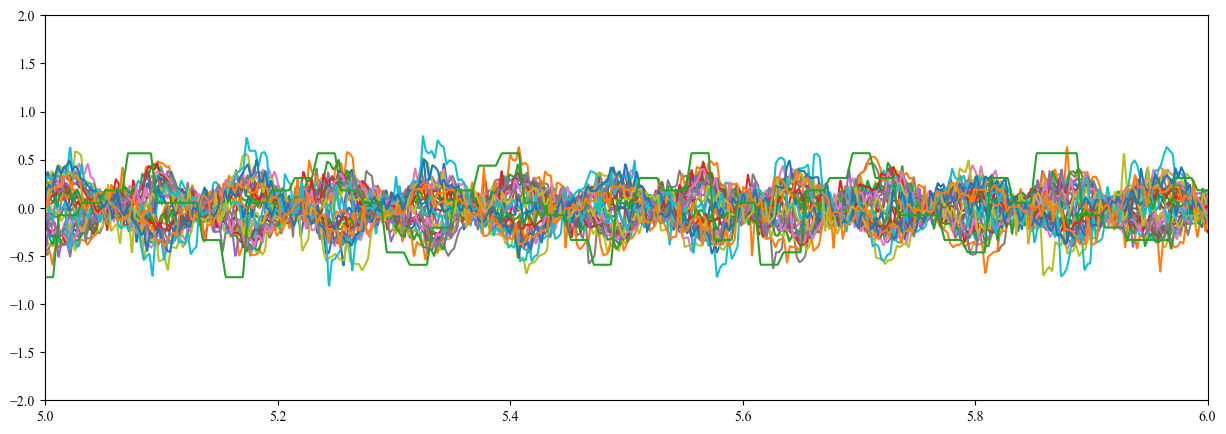

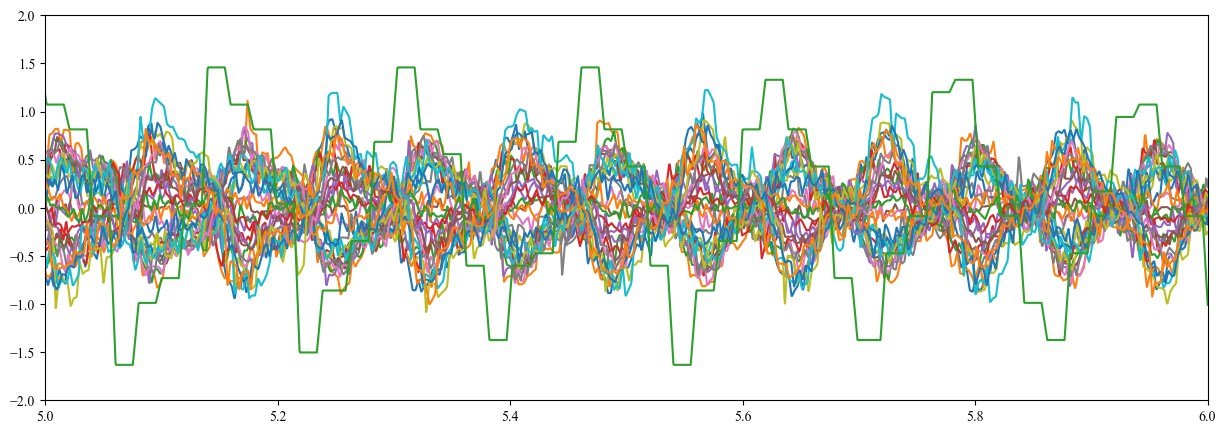

In [59]:
for i in range(1,6):
    fig,ax = plt.subplots(figsize=(15,5))

    for num in tellist:
        j = np.mod(num-2,n)
        if num==1:
            i0 = np.argmax(Z[i][num-1,:])
            t0 = ti[i][i0]+lags[0,j]
        ax.plot(ti[i]+lags[0,j]-t0,Z[i][num-1,:]/Zrms[num-1])
    plt.axis([5,6,-2,2])

In [61]:
Z[1].shape

(33, 59614)

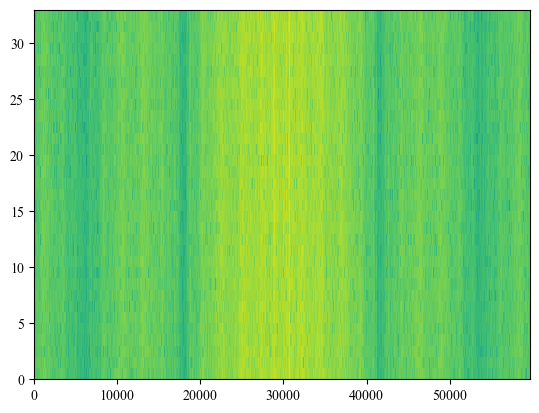

In [73]:
import numpy as np
TF = np.fft.fftshift(np.fft.fft2(Z[1]))
ncell,nt = TF.shape
plt.pcolormesh(np.log10(np.abs(TF)))

(0.1, 200.0, 50.0, 10000.0)

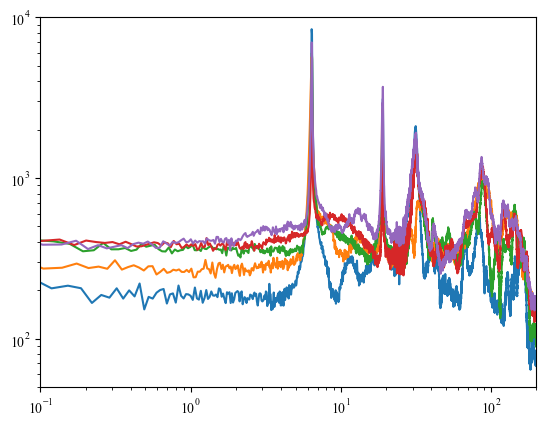

In [80]:
for i in range(1,6):
    TF = np.fft.fftshift(np.fft.fft2(Z[i]))
    ncell,nt = TF.shape
    TF_t = np.mean(np.abs(TF),axis=0)
    dt = ti[i][1]-ti[i][0]

    fmax = 1/dt
    freq = np.linspace(-fmax/2,fmax/2,nt)
    plt.loglog(freq,TF_t)

plt.axis([0.1,200,50,10**4])

TypeError: unhashable type: 'slice'

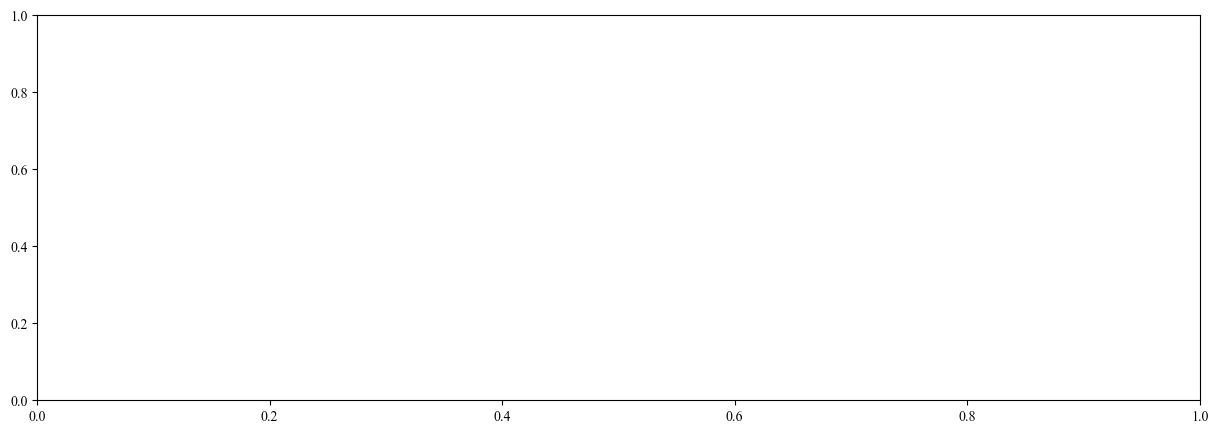

In [25]:
import scipy.signal as sig

fig,ax = plt.subplots(figsize=(15,5))

j=2
n = len(tellist)
#Dt2 = []
for num in tellist:
    num2 = np.mod(num+j-1,n)+1
    #print(num,num2)
    
    C = np.asarray(sig.correlate(Z[num-1,:],Z[num2-1,:],mode='same'))
    Norm = np.sqrt(np.sum(Z[num-1,:]**2)*np.sum(Z[num2-1,:]**2))
    lag = ti-np.mean(ti)
    k = np.argmax(C)
    #Dt2.append(lag[k])
    ax.plot(lag-Dt2[num-1],C/Norm)
    
plt.axis([-1,1,-1,1])

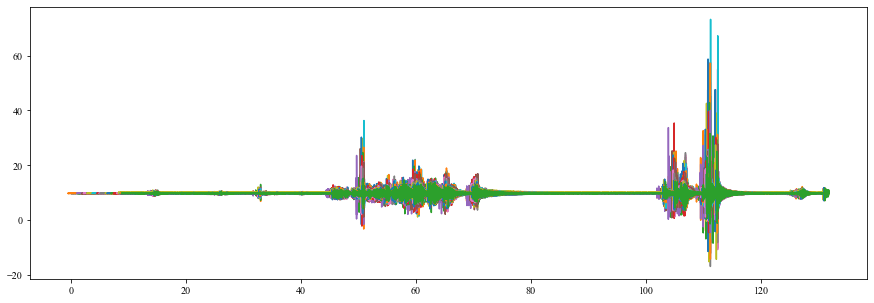

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
C = np.zeros()
for i in range(1,34):
    for j in range(1,34):
        C[i,j] = 
        
    ax.plot(data[key][num]['t']+data['time'][num]['dt'],data[key][num]['az'])